# **COMM475--Investment Policies: Client Objective**

Instructor: Lorenzo Garlappi &copy; 2024<sup>*</sup>

TA: Tianping Wu

<sup>*</sup> <small>These notes are based on Rob Heinkel and Bill Tilford's lecture notes. I am grateful to them for generously sharing this material with me.</small>

# The Strategic Asset Allocation (SAA) Decision


**Client Preferences**

a. "Mean-Variance" tastes

b. Individual Client: has a specific investment horizon (retirement day)

c. A dynamic strategy: life-cycle investing

d. Institutional Client: has very long (infinite?) stream of payments to make

**Individual Risk/Reward Analysis**

a. Objective: choose preferred distribution of start-of-retirement wealth

b. Variables = Asset Class Weights (SAA)

c. Use "life-cycle investing" to account for personal human capital

**Institutional Risk/Reward Analysis**

a. Institution has a liability = the present value of all promised payments into the future

b. Pension Plan Structures: Defined Benefits (DB) Plans; Defined Contribution (DC) Plans

c. Objective: trustees must choose the reward-risk trade-off of the Funding Surplus (FS): FS = Assets - Liability

Choice Variables = Asset Class Weightings (SAA)


#Individual Client Objectives and the SAA Decision

**Using Mean-Variance Analysis to Choose an SAA**

**Individual Client: has a specific investment horizon (retirement day)**

If the individual is planning for retirement, she is concerned with the expected value of her portfolio at retirement (date $T$) and the range of possible portfolio values at date $T$, i.e., the risk of the portfolio. She can adjust this by choosing the expected return and standard deviation of return on her portfolio. This SAA decision can be re-assessed each year as retirement approaches.

On the next page we show a mean-variance efficient frontier (we will demonstrate shortly where this comes from). Each point on the efficient frontier represents a different SAA mix, i.e., different mixes of the allowed asset classes, like T-bills, bonds and stock.

Point ($A$) on the efficient frontier corresponds to a low-risk strategic asset allocation: $100\%$ T-bills. Point ($B$) is a risky strategic asset allocation: $33\%$ T-bills and $67\%$ stock. If the client starts with $\$1$ and is investing for 20 years, the expected ending wealth is shown: $\$1.486$ for mix ($A$) and $\$3.207$ for mix ($B$). The range of ending wealth (plus and minus two standard deviations, as shown) is very narrow for the low-risk SAA mix, and very much wider for SAA mix ($B$). Note that there is almost no chance that the riskier mix will leave the investor with less than the low-risk mix, setting aside the likelihood of a "black swan" event!

Each year the client could re-visit this decision based upon the years remaining to retirement and her actual return experience (i.e., her current wealth).


You are considering two extreme points to invest for a 20 year investment horizon:

Point $A: E(r_{p})=0.02=2 \%$ $\quad \sigma(r_{p})=0.01=1 \%$

Point $B: E(r_{p})=0.06=6 \% \quad \sigma(r_{p})=0.167=16.7 \%$

The graph below shows the combinations of two assets: a low return, low risk T-Bill / bond portfolio and a high return, high risk stock portfolio.

In [2]:
#Define the points with the return and volatility of two portfolios

#expected return
mu_A = 0.02
mu_B = 0.06

#volatility
sigma_A = 0.01
sigma_B = 0.167

#define the point A and point B
points = {
    'A': (sigma_A, mu_A),
    'B': (sigma_B, mu_B)
}

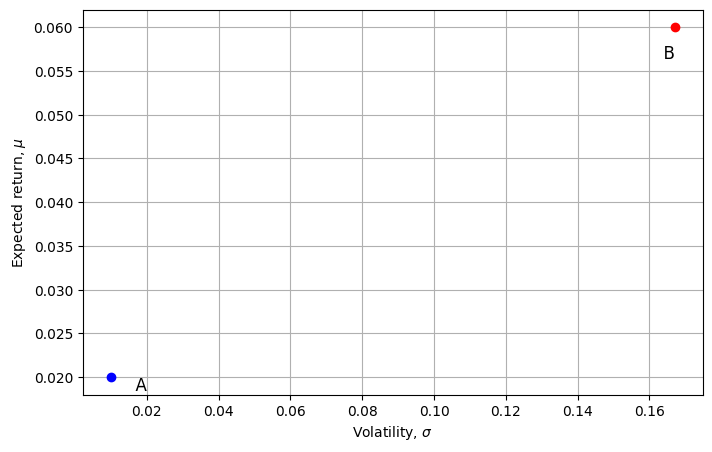

In [3]:
import matplotlib.pyplot as plt #matplotlib.pyplot for plotting

# Create the plot's initial size
plt.figure(figsize=(8, 5))

# Plot the points
for label, (x, y) in points.items():
    if label == 'A':
        plt.scatter(x, y, color='blue', zorder=5)
    else:
        plt.scatter(x, y, color='red', zorder=5)
    if label == 'A':
        plt.text(x + 0.01, y-0.002, f'  {label}', va='bottom', ha='right', fontsize=12)
    else:
        plt.text(x, y-0.004, f'  {label}', va='bottom', ha='right', fontsize=12)

# Set labels and title
plt.xlabel(r'Volatility, $\sigma$')
plt.ylabel(r'Expected return, $\mu$')
plt.grid(True)

# Show the plot
plt.show()

We can calculate the range of possible ending (20 year) wealth levels per $\$1$ invested:

Calculate the horizon expected return, confidence interval and volatility:

In [4]:
#Define the function to calculate the horizon expected return
def horizon_mu(mu, year):
    return (1+mu) ** year

#Define the function to calculate the horizon volatility
def horizon_sigma(sigma, year):
    return sigma*(year ** 0.5)

#Define the function to calculate the upper bound of horizon expected return
def upper_mu(horizon_mu, horizon_sigma, year):
    return horizon_mu + 2*horizon_sigma


#Define the function to calculate the lower bound of horizon expected return
def lower_mu(horizon_mu, horizon_sigma, year):
    return horizon_mu - 2*horizon_sigma

Input the value of the year:

In [5]:
year = 20

Point A:

In [6]:
## input expected return and volatility of A
mu = mu_A
sigma = sigma_A

## output
print("Expected return of A after 20 years: ", f"{horizon_mu(mu, year):.3f}")
print("Volatility of A after 20 years: ", f"{horizon_sigma(sigma, year):.3f}")
print("Upper bound of A after 20 years: ", f"{upper_mu(horizon_mu(mu, year), horizon_sigma(sigma, year), year):.3f}")
print("Lower bound of A after 20 years: ", f"{lower_mu(horizon_mu(mu, year), horizon_sigma(sigma, year), year):.3f}")

Expected return of A after 20 years:  1.486
Volatility of A after 20 years:  0.045
Upper bound of A after 20 years:  1.575
Lower bound of A after 20 years:  1.397


Point B:

In [7]:
## input expected return and volatility of B
mu = mu_B
sigma = sigma_B

## output
print("Expected return of B after 20 years: ", f"{horizon_mu(mu, year):.3f}")
print("Volatility of B after 20 years: ", f"{horizon_sigma(sigma, year):.3f}")
print("Upper bound of B after 20 years: ", f"{upper_mu(horizon_mu(mu, year), horizon_sigma(sigma, year), year):.3f}")
print("Lower bound of B after 20 years: ", f"{lower_mu(horizon_mu(mu, year), horizon_sigma(sigma, year), year):.3f}")

Expected return of B after 20 years:  3.207
Volatility of B after 20 years:  0.747
Upper bound of B after 20 years:  4.701
Lower bound of B after 20 years:  1.713


By adding to and subtracting from the mean wealth two times the standard deviation of the wealth, we get a roughly $95\%$ of a normal probability distribution. The probability of B having an outcome below A is less than $2.5 \%\times2.5 \%$, or almost zero. Most rational investors would, for a $20$ year investment horizon, choose portfolio $B$ or $A$.

This is partly due to the effect of time on risk and return: Return goes up exponentially with time, but risk only goes up by the square root of time.



<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

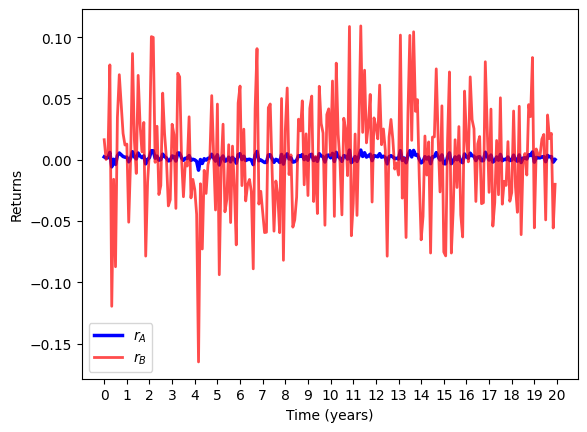

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mu_A = 0.02
sigma_A = 0.01
mu_B = 0.06
sigma_B = 0.167

T_years = 20
freq = 12
T = T_years*freq

def simulate_returns(mu_A, sigma_A, mu_B, sigma_B, T, freq):
    shocks = np.random.randn(T)
    r_A = mu_A/freq + shocks*sigma_A/np.sqrt(freq)
    r_B = mu_B/freq + shocks*sigma_B/np.sqrt(freq)

    # compute the cumulative returns starting with 1 dollar
    W_A = np.cumprod(1 + r_A)
    W_B = np.cumprod(1 + r_B)

    # add 1 at the beginning of the vectors W_A and W_B
    W_A = np.concatenate(([1], W_A))
    W_B = np.concatenate(([1], W_B))

    return r_A, r_B, W_A, W_B

r_A, r_B, W_A, W_B = simulate_returns(mu_A, sigma_A, mu_B, sigma_B, T, freq)


plt.plot(r_A, label=r"$r_A$", linewidth=2.5, color='blue')
plt.plot(r_B, label=r"$r_B$", linewidth=2, color='red', alpha=0.7)
# put ticks on the axis that mark the years instead of the months
plt.xticks(np.arange(0, T+1, freq), np.arange(0, T_years+1))
plt.xlabel("Time (years)")
plt.ylabel("Returns")
plt.legend()
plt



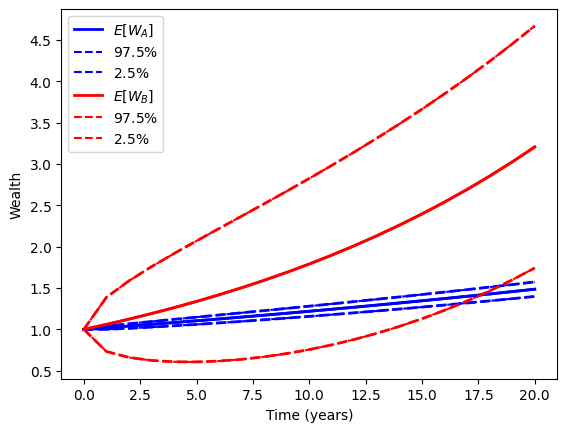

In [9]:
import numpy as np
import matplotlib.pyplot as plt

T_years = 20

# Calculate means, upper bounds, and lower bounds
MEAN_A = (1 + mu_A) ** np.arange(0, T_years+1)
MEAN_B = (1 + mu_B) ** np.arange(0, T_years+1)

UB_A = (1 + mu_A) ** np.arange(0, T_years+1) + 1.96*sigma_A*np.sqrt(np.arange(0, T_years+1))
UB_B = (1 + mu_B) ** np.arange(0, T_years+1) + 1.96*sigma_B*np.sqrt(np.arange(0, T_years+1))

LB_A = (1 + mu_A) ** np.arange(0, T_years+1) - 1.96*sigma_A*np.sqrt(np.arange(0, T_years+1))
LB_B = (1 + mu_B) ** np.arange(0, T_years+1) - 1.96*sigma_B*np.sqrt(np.arange(0, T_years+1))

# Plot the results
plt.plot(np.arange(0, T_years+1), MEAN_A, color='blue', label=r"$E[W_A]$", linewidth=2)
plt.plot(np.arange(0, T_years+1), UB_A, linestyle='dashed', color='blue', label=r"$97.5\%$")
plt.plot(np.arange(0, T_years+1), LB_A, linestyle='dashed', color='blue', label=r"$2.5\%$")

plt.plot(np.arange(0, T_years+1), MEAN_B, color='red', label=r"$E[W_B]$", linewidth=2)
plt.plot(np.arange(0, T_years+1), UB_B, linestyle='dashed', color='red', label=r"$97.5\%$")
plt.plot(np.arange(0, T_years+1), LB_B, linestyle='dashed', color='red', label=r"$2.5\%$")

# Make the lines thicker
plt.gca().set_prop_cycle(None)  # Reset color cycle
plt.plot(np.arange(0, T_years+1), MEAN_A, color='blue', linewidth=2)
plt.plot(np.arange(0, T_years+1), UB_A, linestyle='dashed', color='blue', linewidth=2)
plt.plot(np.arange(0, T_years+1), LB_A, linestyle='dashed', color='blue', linewidth=2)

plt.plot(np.arange(0, T_years+1), MEAN_B, color='red', linewidth=2)
plt.plot(np.arange(0, T_years+1), UB_B, linestyle='dashed', color='red', linewidth=2)
plt.plot(np.arange(0, T_years+1), LB_B, linestyle='dashed', color='red', linewidth=2)

# Set labels
plt.xlabel("Time (years)")
plt.ylabel("Wealth")

# Show legend
plt.legend()

# Show the plot
plt.show()


<!-- **The Individual SAA Decision - Constructing the Mean-Variance Efficient Frontier**

Suppose the client allows three asset classes: (1) T-bills, (2) bonds and (3) stocks. -->

<!-- To construct the M-V efficient frontier, the first step is to find the minimum variance portfolio. This is the mix that is as far to the left in the $M-V$ graph as possible, regardless of expected return. This comes from choosing the weights, $X_{1}$ on T-bills, $X_{2}$ on bonds and $X_{3}=1-X_{1}-X_{2}$ in stock, to minimize the portfolio return variance:

\begin{align*}
\sigma_{p}^{2}=&X_{1}^{2} \sigma_{1}^{2}+X_{2}^{2} \sigma_{2}^{2}+\left(1-X_{1}-X_{2}\right)^{2} \sigma_{3}^{2}+ \\
&2 X_{1} X_{2} \sigma_{1,2}+2 X_{1}\left(1-X_{1}-X_{2}\right) \sigma_{1,3}+2 X_{2}\left(1-X_{1}-X_{2}\right) \sigma_{2,3}
\end{align*}

where $\sigma_{i, j}$ is the covariance of the return on asset classes $i$ and $j$ and $\sigma_{j}$ is the standard deviation of return on class $j$.

Taking the derivatives of $\sigma_{p}^{2}$ with respect to $X_{1}$ and $X_{2}$ gives two linear equations that can be solved for $X_{1}$ and $X_{2}$ and then $X_{3}=1-X_{1}-X_{2}$. Plugging these solutions into $\sigma_{p}^{2}$ and $E\left(r_{p}\right)=X_{1} E\left(r_{1}\right)+$ $X_{2} E\left(r_{2}\right)+X_{3} E\left(r_{3}\right)$ gives us the point to plot in the mean-variance graph.

The second step in constructing the M-V efficient frontier is to trace out the rest of the efficient frontier. We now solve a constrained minimization. We choose $X_{1}$ and $X_{2}$ to minimize $\sigma_{p}^{2}$ subject to the portfolio having a specified expected return, ERP: $E R P=X_{1} E\left(r_{1}\right)+X_{2} E\left(r_{2}\right)+X_{3} E\left(r_{3}\right)$.

We set ERP at different levels, starting at just a little bigger than the expected return on the minimum variance portfolio, and then getting bigger. For each ERP we solve the constrained minimization, getting the optimal asset class weights and the portfolio's expected return and standard deviation. We can then plot these, to get the mean-variance efficient frontier. -->

<!-- The constrained optimization for a relatively simple problem like this can easily be set up on Excel to use Solver. In the 475 course Canvas module for spreadsheets you will find a file (MeanVariancePortfolioCalculator) with an optimizer on tab "Optimizer." By clicking on "data" and "Solver" you can see the set-up for the constrained optimization. -->


**A Mean Variance Efficient Frontier Example**

Suppose we have the following data (see Hamilton and Heinkel (1994) "*The Role of Real Estate in a Pension Portfolio*", Bureau of Asset Management, University of British Columbia):

| Asset Class   | Expected Returns (Quarterly) | Standard Deviation (Quarterly) |
|---------------|-----------------------------|--------------------------------|
| T-Bill        | 1%                          | 1%                             |
| GoC           | 1.50%                       | 7%                             |
| TSX (Cda)     | 2.10%                       | 9%                             |
| DJI (US)      | 2.20%                       | 10%                            |
| Real Estate (RE) | 1.50%                    | 8%                             |


Correlations:

<br>

|         | T-Bill | GoC  | TSX  | DJI  | RE   |
|---------|--------|------|------|------|------|
| T-Bill  | 100%   | 15%  | -10% | -5%  | 15%  |
| GoC     | 15%    | 100% | 40%  | 40%  | -15% |
| TSX     | -10%   | 40%  | 100% | 75%  | -2%  |
| DJI     | -5%    | 40%  | 75%  | 100% | -12% |
| RE      | 15%    | -15% | -2%  | -12% | 100% |


Let us first import packages that we need for our analysis

In [10]:
# import packages

import numpy as np   # needed to perform mathematical operations
import matplotlib.pyplot as plt # needed to plot graphs
from scipy.optimize import minimize # needed to solve optimization problems
import pandas as pd  # to handle dataframes

Here we manually input the expected returns, variances and correlations of risky assets

In [11]:
# Input Data

# Expected returns
mu_t = 0.01   # tbill
mu_g = 0.015  # Bonds
mu_ts = 0.021  # canada tsx
mu_d = 0.022  # us dow jones
mu_r = 0.015  # real estate

# Volatilities
sigma_t = 0.01   # tbill
sigma_g = 0.07  # Bonds
sigma_ts = 0.09  # canada tsx
sigma_d = 0.1  # us dow jones
sigma_r = 0.08  # real estate

# Correlations
rho_tt = 1.0
rho_tg = 0.15
rho_tts = -0.1
rho_td = -0.05
rho_tr = 0.15

rho_gt = rho_tg
rho_gg = 1.0
rho_gts = 0.4
rho_gd = 0.4
rho_gr = -0.15

rho_tst = rho_tts
rho_tsg = rho_gts
rho_tsts = 1
rho_tsd = 0.75
rho_tsr = -0.02

rho_dt = rho_td
rho_dg = rho_gd
rho_dts = rho_tsd
rho_dd = 1
rho_dr = -0.12

rho_rt = rho_tr
rho_rg = rho_gr
rho_rts = rho_tsr
rho_rd = rho_dr
rho_rr = 1



Next, the input code is to collect data of risky assets in the vector/matrix form:

In [12]:
# Collect data of risky assets in vector/matrix form
mu_vec = np.array([mu_t, mu_g, mu_ts, mu_d, mu_r])
sigmas = np.array([sigma_t, sigma_g, sigma_ts, sigma_d, sigma_r])
N = len(mu_vec)  # number of risky assets

# Typical asset used in the
asset_labels = ['T-bill', 'GoC', 'TSX', 'DJI', 'RE']

#correlation matrix -- Risky assets only
corr = np.array([
    [rho_tt, rho_tg, rho_tts, rho_td, rho_tr],
    [rho_gt, rho_gg, rho_gts, rho_gd, rho_gr],
    [rho_tst, rho_tsg, rho_tsts, rho_tsd, rho_tsr],
    [rho_dt, rho_dg, rho_dts, rho_dd, rho_dr],
    [rho_rt, rho_rg, rho_rts, rho_rd, rho_rr]
])

cov_matrix = np.outer(sigmas, sigmas)*corr #covariance matrix

print(sigmas)
print(mu_vec)

print(asset_labels)

[0.01 0.07 0.09 0.1  0.08]
[0.01  0.015 0.021 0.022 0.015]
['T-bill', 'GoC', 'TSX', 'DJI', 'RE']


Here we construct two functions that take a generic portfolio $w$ and compute
1. the expected portfolio return (`portfolio_return`)
2. the portfolio volatility (`portfolio_volatility`)

In [13]:
# Functions for portfolio return and volatility
def portfolio_return(w, mu):
    # return np.dot(w, mu)
    return w @ mu

def portfolio_volatility(w, cov_matrix):
    # return np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    return np.sqrt( w @ cov_matrix @ w)


# Let us test that the functions work using the equal weight 1/N
w = np.ones(len(mu_vec))*(1.0 / len(mu_vec))

print(portfolio_return(w, mu_vec))
print(portfolio_volatility(w, cov_matrix))

0.0166
0.04468646327468757


The next function construct the mean-variance frontier by solving the problem:
$$\min_{w} \sqrt{w^\top \Sigma w},~~s.t. w^
\top \mu = \mu^*,~~\text{and}~~w^\top\mathbf{1}=1$$

By varying the target $\mu^*$ we can trace the whole frontier

We first define a function that does the optimization.

**Note: We do not have the risk-free rate in this version!**

In [14]:
# This function computes the minimum volatility portfolio for a given target return
def find_min_volatility_given_target_mean(mu, cov_matrix, return_target, constr_sw, guess):

    N = len(mu) #number of assets
    #Here we define the cobnstraints for our optimization problem
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, mu) - return_target}, #portfolio return= target
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})                               # sum of weights =1

    if constr_sw == 1:
        bounds = [(0, 1)]*N #No short-selling in all assets

        # You can customize the constraints here
        #  bounds = [(-0.1, 0.5), (-0.1, 0.5), (0, 0.5)]

    # Solve the optimization problem
    if constr_sw==1:
        result = minimize(portfolio_volatility, guess, args=(cov_matrix), method='SLSQP', bounds = bounds, constraints=constraints)
    else:
        result = minimize(portfolio_volatility, guess, args=(cov_matrix), method='SLSQP', constraints=constraints)


    return result


# Test the function
guess = np.ones(len(mu_vec))*(1.0 / len(mu_vec))
constr_sw = 1
mu_target = 0.08
result = find_min_volatility_given_target_mean(mu_vec, cov_matrix, mu_target, constr_sw, guess)

result.x

array([6.82413151e-19, 3.86587441e-17, 9.96963224e-12, 1.00000000e+00,
       2.45989691e-18])

We then define a function that invokes the function `find_min_volatility_given_target_mean()` for many values of $\mu^*$ to construct the contraint frontier

In [15]:
# Function that generates the Efficient Frontier
num_points = 100 # number of points (mu_targets) used to draw the frontier

def construct_mv_frontier(mu_vec, cov_matrix, constr_sw=0):
    mu_LB = min(mu_vec)/1.01 # Lower bound of expected return target
    mu_UB = max(mu_vec)*1.01 # Upper biond of expected return target

    frontier_returns = np.linspace(mu_LB, mu_UB, num_points)  #construct a grid of expexted returns
    frontier_risks = np.full(num_points, np.nan) #Initialize the frontier to NaN (= Not a Number)
    all_weights = []  # Collect portfolio weights for each iteration


    N = len(mu_vec)
    init_guess = np.ones(N)*(1.0 / N) # this is the initial guess used by the optimization algorithm

    # Define constraints and bounds (no short selling for the first asset)
    for i in range(num_points):
        return_target = frontier_returns[i]

        #Here we invoke the function that determine the minimum volatility portfolio given a target return [defined above]
        result = find_min_volatility_given_target_mean(mu_vec, cov_matrix, return_target, constr_sw, init_guess)

    # Collect portfolio weights, expected return, and volatility
        weights_dict = {'Weights': result.x, 'Expected Return': return_target, 'Volatility': result.fun}
        all_weights.append(weights_dict)

     # updated Initial guess to the most recent solution
        init_guess = result.x

        if result.success:
            frontier_risks[i] = result.fun

    # Convert the list of dictionaries to a DataFrame
    df_weights = pd.DataFrame(all_weights)

    return frontier_risks, frontier_returns, df_weights

Then we plot the constraint frontier:

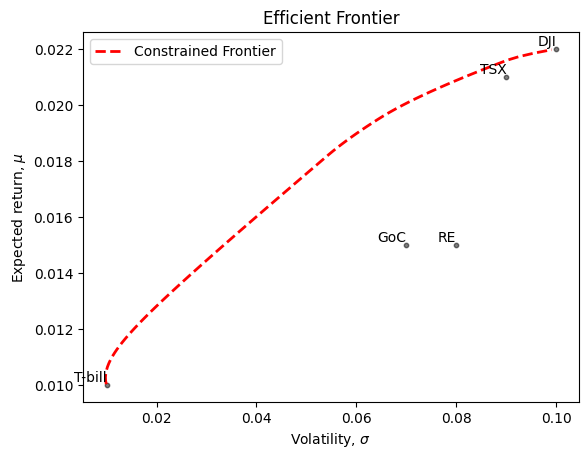

In [16]:
#Constrained frontier
# Generate Efficient Frontier and find Tangent Portfolio

%matplotlib inline
frontier_risks_constr, frontier_returns_constr, \
df_weights_constr = construct_mv_frontier(mu_vec, cov_matrix, constr_sw=1)

# Define the sigma range range for the capital allocation line
sigma_range = np.linspace(0, np.nanmax(frontier_risks_constr))

# Plot the frontier
fig, ax = plt.subplots()
ax.plot(frontier_risks_constr, frontier_returns_constr, 'r--', linewidth=2, label='Constrained Frontier')

# Mark the position of the assets
ax.scatter(sigmas, mu_vec, color='black', alpha=0.5, s=40, marker='.')  # Asset points

# Add labels for each asset
for i, txt in enumerate(asset_labels):
    ax.text(sigmas[i] + 0.000001, mu_vec[i] + 0.000001, txt, ha='right', va='bottom')  # Adjust label positioning if necessary


# Add axis labels and title
ax.set_xlabel(r'Volatility, $\sigma$')
ax.set_ylabel(r'Expected return, $\mu$')
ax.set_title('Efficient Frontier')

# Show legend
ax.legend()

We have three portfolios on the frontier with target returns 1.5%, 2% and 2.2% respectively. Then we find the weights and calculate the respective volatility.


In [17]:
# Target Returns
target_returns = [0.015, 0.02, 0.022]

# Store Results
results = []

constr_sw = 1; # 1: no short-selling, 0: short-selling allowed

for target_return in target_returns:

    initial_guess = np.ones(N)*(1.0 / N) # this is the initial guess used by the optimization algorithm

    solution = find_min_volatility_given_target_mean(mu_vec, cov_matrix, target_return, constr_sw, initial_guess)

    if solution.success:
        optimized_weights = solution.x
        optimized_std = portfolio_volatility(optimized_weights, cov_matrix)
        results.append((target_return, optimized_std, optimized_weights))

# Show Results

df_results = pd.DataFrame(results, columns=['Target_Return', 'Portfolio_Std_Dev', 'Portfolio_Weights'])
# round the portfolio weights to 4 digigts
df_results['Portfolio_Weights'] = df_results['Portfolio_Weights'].apply(lambda x: np.round(x,3))
df_results

,Target_Return,Portfolio_Std_Dev,Portfolio_Weights
0,0.015,0.033506,"[0.397, 0.092, 0.138, 0.165, 0.208]"
1,0.020,0.069349,"[0.0, 0.0, 0.333, 0.429, 0.238]"
2,0.022,0.100000,"[0.0, 0.0, 0.0, 1.0, 0.0]"


Finally, we plot the additional protfolios on the constraint frontier:

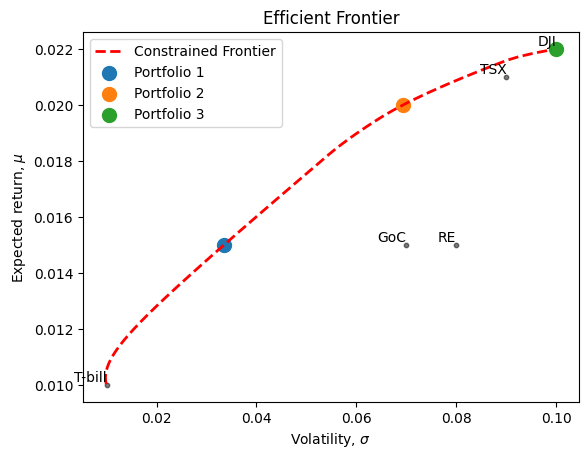

In [18]:
# Plot the frontier
fig, ax = plt.subplots()
ax.plot(frontier_risks_constr, frontier_returns_constr, 'r--', linewidth=2, label='Constrained Frontier')

# Mark the position of the assets
ax.scatter(sigmas, mu_vec, color='black', alpha=0.5, s=40, marker='.')  # Asset points

# Add labels for each asset
for i, txt in enumerate(asset_labels):
    ax.text(sigmas[i] + 0.000001, mu_vec[i] + 0.000001, txt, ha='right', va='bottom')  # Adjust label positioning if necessary

# Extract return and volatility from df_results for plotting
returns = df_results['Target_Return']
volatilities = df_results['Portfolio_Std_Dev']

# Plot each portfolio in df_results
for i in range(len(returns)):
    ax.scatter(volatilities[i], returns[i], s=100, label=f'Portfolio {i+1}')

# Add axis labels and title
ax.set_xlabel(r'Volatility, $\sigma$')
ax.set_ylabel(r'Expected return, $\mu$')
ax.set_title('Efficient Frontier')

# Show legend
ax.legend()

The Minimum Variance Portfolio (MVP) is not all Tbills; it has 3 Dollars of the TSX because these two asset classes have a negative correlation of $-10\%$.

As we go up the risk-reward frontier, Tbills drop (low Expected Return), stocks rise (from $3\%$ to $33\%$ to $87\%$ to $100\%$) and bonds and Real Estate enter and exit (i.e. Real Estate's weight goes from $0\%$ to $23\%$ to $13\%$ to $0\%)$.

Real Estate is valuable because it is diversifying: see all the negative correlations Real Estate has with the other Asset Classes. But, it eventually drops out in the high-reward portfolios because its expected return is not as great as stocks.

# The Individual SAA Decision - Life-cycle Investing

The above decision involves allocating the investor's financial capital. But, for younger investors, a large portion of their total wealth is human capital, defined as the present value of the investor's expected future wage income. For someone just entering the work force, human capital is the majority of an investor's wealth. At retirement, the value of human capital may be near zero.

The characteristics of an investor's human capital depend upon their profession. A tenured professor has an income stream that is very "bond-like" in that it will not fluctuate greatly over his or her career. A unionized employee in a stable industry would also have a bond-like income stream. An entrepreneur, on the other hand, may have an income stream that is much more "equity-like."

The characteristics of an investor's total wealth will, when human capital is the major source of wealth, look like that human capital. On the next page, we do an example of "life-cycle investing" in which the asset allocation of the investor's financial portfolio depends upon how big her human capital wealth is relative to her financial wealth.

Suppose an investor has a projected income stream that is stable and that the investor has no financial wealth. This investor's total wealth looks like a bond portfolio. At retirement, that investor will have a large financial wealth, but her human capital value may be zero. She can set her total wealth allocation by setting her financial portfolio allocation.

What if this investor wants her total wealth to always be $50\%$ bonds and $50\%$ stock? The following shows how to alter the investor's financial portfolio allocation to adjust for the change in the mix of human capital wealth and financial wealth. This is called "life-cycle investing."


**An Example of Life-Cycle Investing**

Here we use the same notation as in the Multi-Risk Factor (MRF) section (see page MRF-4). A life-cycle investor considers her time t human capital value $\left(H_{t}\right)$ in making her SAA choice. We define total wealth $\left(W_{t}\right)$ as the sum of financial wealth $\left(P_{t}\right)$ plus human capital value $\left(H_{t}\right)$ :

$$
W_{t}=H_{t}+P_{t}
$$

Suppose this investor considers her human capital to be "bond-like" for purposes of the SAA choice, and she wants, at all points in time, to have $50 \%$ of her total wealth in fixed income assets (defined as bonds, $B_{t}$, and/or human capital, $H_{t}$ ):

$$
B_{t}+H_{t}=.5 W_{t}
$$

We first define a function to calculate the optimal bond allocation for an investor who wants 50% of total wealth in fixed income assets.

In [19]:
def calculate_optimal_bond_allocation(P_t, H_t):
    """
    :param P_t: Financial wealth at time t
    :param H_t: Human capital value at time t
    :return: Optimal bond allocation at time t
    """
    W_t = H_t + P_t  # Total wealth
    target_fixed_income = 0.5*W_t  # Target fixed income value
    B_t = target_fixed_income - H_t  # Optimal bond allocation
    return B_t

**At age 25**:

Suppose financial wealth $P_{25}=\$50,000$ and human capital value $H_{25}=\$ 950,000$ for total wealth of $W_{25}=\$ 1$ million.

So, the investor has $\$ 950,000$ in "fixed income" (in the form of human capital). Using the above equation to find the optimal $B_{25}$ :

\begin{align*}
B_{25}+H_{25}&=0.5 W_{25} \\
B_{25}+950,000&=0.5(1,000,000)
\end{align*}

So, $B_{25}=-\$ 450,000$

The investor has WAY too much human capital value, so to get her "fixed income" investment down to $\$ 500,000$, she has to short bonds by borrowing $\$ 450,000$.

We will assume the investor cannot borrow $\$ 450,000$ and so, instead, she holds her financial portfolio of $\$ 50,000$ all in stocks. So, the investor has a financial portfolio that is all $(100 \%)$ stocks, as most young people probably should!


In [20]:
# At age 25
P_25 = 50000  # Financial wealth at age 25
H_25 = 950000  # Human capital value at age 25

# Calculate the optimal bond allocation at age 25
B_25 = calculate_optimal_bond_allocation(P_25, H_25)

print("Optimal bond allocation at age 25: ", f"{B_25}")

Optimal bond allocation at age 25:  -450000.0


**At age 40**:

Suppose now $P_{40}=\$ 700,000$ (our financial portfolio has grown quite well over the last 15 years) and $H_{40}=\$ 500,000$ for a total wealth of $W_{40}=\$ 1.2$ million. Again, solving for the optimal bond holding:

\begin{align*}
B_{40}+H_{40}&=.5 W_{40} \\
B_{40}+500,000&=.5(1,200,000)
\end{align*}

So, $B_{40}=\$ 100,000$.

The investor divides her financial wealth of $P_{40}=\$ 700,000$ into stocks of $S_{40}=\$ 600,000$, and bonds of $B_{40}=\$ 100,000$ (note that $B_{40}+S_{40}=P_{40}$

So, now the investor's SAA mix is $600 / 700=0.86$ in stocks (and so $14 \%$ in bonds).

15 years ago the investor was $100 \%$ stocks and no bonds, so she has become less "aggressive" than she was at age 25 .


In [21]:
# At age 40
P_40 = 700000  # Financial wealth at age 40
H_40 = 500000  # Human capital value at age 40

# Calculate the optimal bond allocation at age 40
B_40 = calculate_optimal_bond_allocation(P_40, H_40)

print("Optimal bond allocation at age 40: ", f"{B_40}")

Optimal bond allocation at age 40:  100000.0


**At age 65**:

Suppose now financial wealth $P_{65}=\$ 900,000$ and human capital value $H_{65}=\$ 0$ for total wealth of $W_{25}=$ $\$ 900,000$. Her human capital is exhausted!

Solving for the optimal amount of bonds to hold now:

$$
B_{65}+0=.5(900,000)
$$

So,

$$
B_{65}=450,000
$$


In [22]:
# At age 65
P_65 = 900000  # Financial wealth at age 65
H_65 = 0  # Human capital value at age 65

# Calculate the optimal bond allocation at age 65
B_65 = calculate_optimal_bond_allocation(P_65, H_65)

print("Optimal bond allocation at age 65: ", f"{B_65}")

Optimal bond allocation at age 65:  450000.0


Now the investor has a financial portfolio with $50 \%$ in bonds and $50 \%$ in stock. Because $H_{65}=\$ 0$, the financial portfolio breakdown is the same as the total wealth split she desires $(50 / 50)$.

As the investor ages, her financial wealth grows and her human capital wealth (which is bond-like) shrinks. So, the investor's financial portfolio transitions over time from being all equity, to a portfolio, at retirement, that is a mix of bonds and stock.

Changing the year-by-year allocation of an investor's financial portfolio as the value of their human capital changes over time is called "life cycle investing," and the particular path that the equity weighting in the financial portfolio decreases as retirement approaches is called the "glide path" of the investor's financial portfolio SAA decision. "Target-Date Funds" do this automatically for investors.


# The Institutional Client Objective

**Defined Benefit Pension Plans**

(1) Benefits paid to retiring members are promised when the member joins the pension plan

(2) Benefits are typically related to:

Length of service

Ending wage

Cost of living (inflation indexed)

(3) Promised benefits are a stream of payments stretching for 40 or 50 years (the retirement life of the member)

(4) The pension plan's liability is the present value of all the promised payments

The present value typically uses a mid-length (e.g. 10 year) bond yield as the discount rate

(5) The Pension Plan Trustees' concern is with the stochastic Funding Surplus, which is the difference between Pension Plan assets and the liability

| Pension Plan Balance Sheet |       |       |
|----------------------------|-------|-------|
| **Assets**                 |       | **Liability** |
|                            |       |       |
|                            |       |   **Funding Surplus** = Assets - Liability    |



Assets $=$ the plan endowment + the present value of future contributions

Liability $=$ present value of pension payment future promised payments


**Defined Contribution Pension Plans**

The sponsor only promises to make contributions into the members retirement account until retirement. The benefit the member gets at retirement depends upon how much the account earned during the members' working life.

Thus, there is no "promise," so there is no explicit liability for the pension plan

BUT, there is an implicit liability: the pension trustees should work to raise the member's standard of retirement living to an appropriate level. This implicit liability is really no different than the real liability in the defined benefit pension plans.

So, we will use the DB Plan as our example, but the same analysis applies for DC plans as well!

**The DB Pension Plan Structure**

Assets: the market value of all the contributions (made by the Sponsor) and retained earnings accumulated in the plan, plus the present value of future promised contributions from the sponsor. Retired members receive pension payments from this account. Contributions are required to keep the plan "funded" (see below)

Liability: the present value of all promised payments, to all members currently working and retired

Funding Surplus: the difference between assets and liability; a positive funding surplus means the plan is funded, a negative funding surplus means the plan is underfunded and the Sponsor will be required to make additional contributions to the plan.


**A Strategic Asset Allocation (SAA) Example**

|                                 | Present Value | **t=1** | **t=2** | **t=3** |
|---------------------------------|---------------|---------|---------|---------|
| + Contributions (from Sponsor)  | 27.23         | 10      | 10      | 10      |
| - Liability                     | 40.41         | 10      | 15      | 20      |
| + Investments                   | 13.17         |         |         |         |
| = Total (Funding Surplus)       | 0.00          |         |         |         |


Discount rate for Contributions (C) and Liability (L) $=5 \%$

**Scenario 1:** Buy Strip Bonds to pay 5 at $\mathrm{t}=2$ and 10 at $\mathrm{t}=3$

$Cost = \frac{5}{(1.05)^{2}}+\frac{10}{(1.05)^{3}}=13.17$

Would just meet all its expected payments (liability)

Strategy known as cash flow matching, it "immunizes" the Funding Surplus: FS=0 today and for the future

**Scenario 2:** Instead of investing in strips, suppose the plan manager chooses to invest the $\$ 13.17$ in an equity portfolio, which has an expected return of $10 \%$ each period:

|                             | Present Value | **t=1** | **t=2** | **t=3** |
|-----------------------------|---------------|---------|---------|---------|
| Contributions (from Sponsor) | 27.23         | 10      | 10      | 10      |
| Liability                   | 40.41         | 10      | 15      | 20      |
| Investments                 | 13.17         | 14.49   | 15.94   | 12.03   |
| Pay shortfall               |               | 0       | 5       | 10      |
| Remaining Investments       | 0             | 14.49   | 10.94   | 2.03    |


The plan thus expects to have $\$ 2.03$ extra left when the plan closes. That means, at $t=3$, the sponsor need only contribute $\$ 10-2.03=\$ 7.97$. This is call a "Contribution Holiday" for plan sponsor, and they can redeploy that money to shareholders!

Taking out this extra is a contribution holiday and it eases the funding burden of the sponsor. This may be why some plans increase the equity portion of the assets: They want the stock market to fund the plan so they don't need to make contributions into the plan.

But suppose the stock market does NOT earn $10 \%$, as we expected. In fact, suppose we lose EVERYTHING at $\mathrm{t}=1$ (i.e. the $\$ 13.17$ investment ends up worth zero). In this case we have no cash to pay the needed $\$ 5$ at $t=2$ and $\$ 10$ at $t=3$. Our risky strategy didn't work and the sponsor has to cough up the additional $\$ 5$ at $t=2$ and the $\$ 10$ at $t=3$, over and above the expected $\$ 10$ contribution each period.

The first Scenario (cash flow matching) strategy is riskless, but the sponsor must contribute $\$ 10$ at $\mathrm{t}=1,2$, and 3 . If the risky (equity investment) strategy is employed and it works, then the sponsor can take "contribution holidays" and reduce their required cash injections.

But, if the risky strategy fails, the sponsor has to inject even more cash than under the cash flow matching strategy..... "Risk and Reward"!!!


**How a DB Plan Liability Can Change**

We will use the example from the previous page. This is a Defined Benefit pension plan with 3 years of promised payments to pensioners.

**Case (a)** Suppose GDP surges, causing the marginal productivity of labor to rise, causing wages to rise, causing future pension benefits to rise to 12 at $t=1,20$ at $t=2$ and 25 at $t=3$. At the $5 \%$ discount rate, these payments have a present value of $L=51.17$. Thus,

\% change in $\mathrm{L}=\frac{51.17}{40.41}-1=0.266=26.6 \%$

Thus, an increase in expected future pension payouts can certainly raise the liability and throw the plan into a funding shortfall (Funding Surplus $<0$ ).

**Case (b)** Suppose a rise in interest rates causes the discount rate for the liability to rise to $7 \%$. Here, we will assume the discount rate on future contributions does NOT change from $5 \%$. Discounting the original required payments at this new discount rate leads to $L=38.77$. Thus,

\% change in $\mathrm{L}=\frac{38.77}{40.41}-1=-0.041=-4.1 \%$

This decrease in the liability raises the funding surplus of the plan.

We may want our assets to have similar exposures to changes in GDP and changes in interest rates as the liability. So, if the liability moves because of these risk factors, then the assets will tend to move in the same direction; this will reduce the volatility of the funding surplus, since it is $FS + A - L$.

The assets will move with GDP if we hold stocks (e.g., industrials and transportation stocks) in the portfolio and the assets will move inversely with interest rates (as the liability does) if we hold bonds in the asset portfolio.

Most pension plans DO have both stock and bond exposure in their asset risk profile, and this DOES mean $A$ and $L$ will tend to move together, reducing $F S=A-L$ volatility.


# A Defined Benefit Pension Plan Objective:

**Funding Surplus Risk Management**

|              |                         |               |                         |
|:------------|:-----------------------|:-------------|:-----------------------|
|   **t=0**    |                         |   **t=1**     |                         |
| **Assets** $A_0$ | **Liability** $L_0$ | **Assets** $A_1= A_0\times (1+r_A)$ | **Liability** $L_1 = L_0\times (1 + r_L)$|
|   &nbsp;     | **Funding Surplus** $FS_0 =  A_0 - L_0$ |   &nbsp;      | **Funding Surplus** $FS_1 = A_1 - L_1$ |



Above are the pension plan's balances sheets at the start of the year $(t=0)$ and at the end of the year $(\mathrm{t}=1)$. In between, the assets had a return of $r_{A}$ and the liability had a change in value of $r_{L}$, leading to new asset and liability values at date $t=1$. Since the assets and liability changed value over the year, so will the funding surplus, FS.

The change over a period in the funding surplus is $F S_{1}-F S_{0}$, and the percentage change in the funding surplus, which we call the return to the funding surplus, is $r_{FS}= \frac{F S_{1}-F S_{0}}{F S_{0}}$ Where:

So

$$
F S_{1}=A_{1}-L_{1}=A_{0}\left(1+r_{A}\right)-L_{0}\left(1+r_{L}\right)=A_{0}-L_{0}+r_{A} A_{0}-r_{L} L_{0}
$$

Therefore, 
\begin{align*}
F S_{1}-F S_{0}&=r_{A} A_{0}-r_{L} L_{0}
r_{FS}&= \frac{F S_{1}-F S_{0}}{F S_{0}}=\left(\frac{A_{0}}{F S_{0}}\right) r_{A}-\left(\frac{L_{0}}{F S_{0}}\right) r_{L}=\alpha r_{A}+(1-\alpha) r_{L}
\end{align*}

With $\alpha=\left(\frac{A_{0}}{F S_{0}}\right)>1$ and $(1-\alpha)=-\left(\frac{L_{0}}{F S_{0}}\right)<0$.

So, $r_{FS}=\alpha r_{A}+(1-\alpha) r_{L}$ looks like a weighted average of the two returns, with slightly unusual weights. But, $r_{FS}$ is basically like $r_{A}-r_{L}$. We'll now define $r_{A}$ and $r_{L}$.

We use the MRF Model return generating functions, and the expected return equations:

\begin{align*}
r_{A}&=E\left(r_{A}\right)+\beta_{1 A} I_{1}+\beta_{2 A} I_{2}+e_{A} \\
r_{L}&=E\left(r_{L}\right)+\beta_{1 L} I_{1}+\beta_{2 L} I_{2}+e_{l} \\
E\left(r_{A}\right)&=r_{f}+\lambda_{1} \beta_{1 A}+\lambda_{2} \beta_{2 A} \\
E\left(r_{L}\right)&=r_{f}+\lambda_{1} \beta_{1 L}+\lambda_{2} \beta_{2 L}
\end{align*}


The random "shocks" (all with expected values of 0 ) are the risk factor shocks, $I_{1}$ (GDP risk?) and $I_{2}$ (interest rate risk?) and the unsystematic shocks, $e_{a}$ and $e_{l}$.

The sensitivities of the assets to risk factors shocks are the betas: $\beta_{1 A}$ and $\beta_{2 A}$ and the liability has its own betas, $\beta_{1 L}$ and $\beta_{2 L}$. The liability betas are given by the features of the pension plan promises, but the pension plan can choose the asset betas.


Plugging these 4 equations into $r_{FS}$ shows


\begin{align*}
r_{FS}=r_{f}+\lambda_{1}\left[\alpha \beta_{1 A}+(1-\alpha) \beta_{1 L}\right]+\lambda_{2}\left[\alpha \beta_{2 A}+(1-\alpha) \beta_{2 L}\right] \\
+\left[\alpha \beta_{1 A}+(1-\alpha) \beta_{1 L}\right] I_{1}+\left[\alpha \beta_{2 A}+(1-\alpha) \beta_{2 L}\right] I_{2}+\alpha e_{a}+(1-\alpha) e_{l} .
\end{align*}


The two terms in the square brackets are basically asset beta minus liability beta for risk factors 1 and 2 . If we define those as funding surplus betas:


\begin{align}
\beta_{1 FS}&=\alpha \beta_{1 A}+(1-\alpha) \beta_{1 L}=\left(\frac{A_{0}}{F S_{0}}\right) \beta_{1 A}-\left(\frac{L_{0}}{F S_{0}}\right) \beta_{1 L} \\
\beta_{2 FS}&=\alpha \beta_{2 A}+(1-\alpha) \beta_{2 L}=\left(\frac{A_{0}}{F S_{0}}\right) \beta_{2 A}-\left(\frac{L_{0}}{F S_{0}}\right) \beta_{2 L}
\end{align}


To understand this, for the $\beta_{1 FS}$ equation, for example, if I multiply through by $F S_{0}$,

$$
F S_{0} \beta_{1 FS}=A_{0} \beta_{1 A}-L_{0} \beta_{1 L}
$$

This equation says that the funding surplus dollar volatility (this is what the pension plan trustees care about!) is the asset dollar volatility minus the liability dollar volatility. Again, the liability and its betas to the two risk factors are given, but the trustees can choose $\beta_{1 A}$ and $\beta_{2 A}$.

For example, if we want $\beta_{1 FS}=0$ we must choose $\beta_{1 A}$ such that $A_{0} \beta_{1 A}-L_{0} \beta_{1 L}=0$.

We use these definitions in getting the expected funding surplus return (or "funding surplus growth") and variance of the funding surplus return:

$$
\begin{gathered}
E[r_{FS}]=r_{f}+\lambda_{1} \beta_{1 FS}+\lambda_{2} \beta_{2 FS} \\
\sigma^{2}\left(r_{FS}\right)=\beta_{1 FS}^{2} \sigma^{2}\left(I_{1}\right)+\beta_{2 FS}^{2} \sigma^{2}\left(I_{2}\right)
\end{gathered}
$$

In the funding surplus variance equation we are ignoring the unsystematic variances. Note we assume the risk factors shocks are uncorrelated with each other. These equations should look familiar from the MRF Model notes! But here, the funding surplus betas are determined by the liability betas (which trustees CANNOT pick) and the asset betas (which the trustees CAN control). So, the trustees CAN set the funding surplus betas.

In the next section we will pick the funding surplus betas, $\beta_{1 A}$ and $\beta_{2 A}$, to minimize the funding surplus variance, $\sigma^{2}\left(r_{FS}\right)$, subject to achieving a satisfactory level of expected funding surplus growth, $E[r_{FS}]$. That is, we want a point on the efficient frontier of the funding surplus expected growth (return) and risk.


# The Funding Surplus Capital Market Line

The FS CML comes from an optimization process that finds portfolios, and their associated factor betas, that minimize FS risk, holding FS expected growth constant (and done for all levels of expected FS growth).

Each point on the CML represents optimal betas. In the 1-factor CAPM, the two key points are an all Tbill portfolio and the market (tangent) portfolio with, respectively:

\begin{align*}
E[r_p]&=r_f,~\sigma[r_p]=0,~~\text{and}~~ \beta_p=0\\
E[r_p]&=r_m,~\sigma[r_p]=\sigma_m,~~\text{and}~~ \beta_p = \beta_m=1
\end{align*}

The similar idea holds in the multi-factor model, but each point on the CML is characterized by as many betas as we have risk factors

The pension manager's job is to choose a funding surplus growth rate, $E[r_{FS}]=\bar{r}_{FS}$, that suits that pension plan; the plan must also be happy with the level of funding surplus volatility that goes along with that optimal portfolio, $\sigma^{*}[r_{FS}]$.

Then, the composition of that portfolio is the factor betas corresponding to that point on the CML: $\beta^*_{1,FS}$ and $\beta^*_{2,FS}$. Thus, to achieve a funding surplus growth rate and volatility we prefer, we know what systematic risk exposures the funding surplus must have to reach that reward-risk point in the most efficient way.

Once we have chosen the optimal funding surplus betas, we use the definitions shown before:


\begin{align*}
\beta^*_{1,FS} &= \alpha \beta^*_{1A}+(1-\alpha) \beta^*_{1L} \\
\beta^*_{2,FS} &= \alpha \beta^*_{2A}+(1-\alpha) \beta^*_{2L}
\end{align*}


We know the liability betas and have chosen the funding surplus betas, so we can solve these equations for the optimal asset betas (for our asset portfolio).



**Determining the Optimal Asset Risk Exposure**

**Step 1**

The trustee knows $A_{0}, L_{0}, F S_{0}=A_{0}-L_{0}$ and $\beta_{1 L}$ and $\beta_{2 L}$.

$\beta_{1 L}$ and $\beta_{2 L}$ can be estimated from a regression of historical liability percentage changes on historical risk factor shocks.
\end{itemize}

**Step 2**
The trustee specifies a desired expected return, $E[r_{FS}]= \overline{r}_{FS}$

Choosing $\overline{r}_{FS}$ determines how fast the plan's funding surplus is expected to grow.

**Step 3**

The trustee calculates the ex-ante funding surplus CML (CML is Capital Market Line, as in the CAPM 1factor model). As in the CAPM, this is a schedule of efficient combinations of assets, meaning they minimize funding surplus risk for a given level of expected funding surplus growth. Recall what happens in the CAPM CML: the intercept has $\sigma_{p}=0$ and $E\left(r_{p}\right)=r_{f}$ and this portfolio of all Tbills has $\beta_{p}=0$. As one moves out the CML, the $\beta_{p}$ gets bigger, exceeding 1 when you begin to short Tbills to invest in the market portfolio (with $\beta_{m}=1$ ).

A similar "efficient frontier" CML results from multi-factor model. But, because there is more than one risk factor, each point on the funding surplus CML is characterized by as many factor betas as we have risk factors.

**Step 4**

By choosing the $\overline{r}_{FS}$, the trustee can then see from the CML what is the funding surplus risk level and what are the optimal funding surplus betas to the risk factors necessary to obtain that $\overline{r}_{FS}$.

The optimizing procedure to identify the optimal funding surplus betas for any reward-risk point on the FS CML provides the mean-variance efficient funding surplus betas:


\begin{align*}
\beta_{1 FS}^{*}&=\frac{\lambda_{1} / \sigma_{1}^{2}}{\lambda_{1}^{2} / \sigma_{1}^{2}+\lambda_{2}^{2} / \sigma_{2}^{2}}\left(\overline{r}_{FS}-r_{f}\right) \quad \text { where } \sigma_{1}^{2}=\sigma^{2}\left(I_{1}\right) \text { and } \sigma_{2}^{2}=\sigma^{2}\left(I_{2}\right) \\
\beta_{2 FS}^{*}&=\frac{\lambda_{2} / \sigma_{2}^{2}}{\lambda_{1}^{2} / \sigma_{1}^{2}+\lambda_{2}^{2} / \sigma_{2}^{2}}\left(\overline{r}_{FS}-r_{f}\right)
\end{align*}


so that: $\sigma^{*}[r_{FS}]=\frac{\overline{r}_{FS}-r_{f}}{\sqrt{\lambda_{1}^{2} / \sigma_{1}^{2}+\lambda_{2}^{2} / \sigma_{2}^{2}}}$

and:

$$
E[r_{FS}]=r_{f}+\lambda_{1} \beta_{1 FS}^{*}+\lambda_{2} \beta_{2 FS}^{*}=\overline{r}_{FS}
$$

Note that both $E[r_{FS}]$ and $\sigma^{*}\left(r_{FS}\right)$ are linear in $\overline{r}_{FS}$, which means the CML is a straight line.

Finally, the above optimal funding surplus betas can be converted to the corresponding optimal asset betas.

Since $\quad F S_{0} \beta_{1 FS}=A_{0} \beta_{1 A}-L_{0} \beta_{1 L} \quad$ and $\quad F S_{0} \beta_{2 FS}=A_{0} \beta_{2 A}-L_{0} \beta_{2 L}$

the trustees determine the optimal exposure to risks 1 and 2 for the client's assets:


\begin{align*}
\beta_{1 A}^{*}&=\left(\frac{F S_{0}}{A_{0}}\right) \beta_{1 FS}^{*}+\left(\frac{L_{0}}{A_{0}}\right) \beta_{1 L} \\
\beta_{2 A}^{*}&=\left(\frac{F S_{0}}{A_{0}}\right) \beta_{2 FS}^{*}+\left(\frac{L_{0}}{A_{0}}\right) \beta_{2 L}
\end{align*}


These are what the trustee needs to structure the pension plan's optimal asset investments. An asset portfolio with $\left(\beta_{1 A}^{*}, \beta_{2 A}^{*}\right)$ will provide funding surplus betas of $\left(\beta_{1 FS}^{*}, \beta_{2 FS}^{*}\right)$, which will yield the point on the funding surplus CML that the trustees chose.

**A Summary of the ALM Model Procedure**

Step 1: Trustees know the basic pension plan characteristics: $A_{0}, L_{0}, F S_{0}=A_{0}-L_{0}$ and $\beta_{1 L}$ and $\beta_{2 L}$.

Step 2: Trustees choose a growth rate for the funding surplus ($\overline{r}_{FS}$).

Step 3: From basic capital market data, trustees know $\lambda_{1}, \lambda_{2}, \sigma_{1}$ and $\sigma_{2}$. This allows them to construct the Funding Surplus CML.

Step 4: Given the CML (Step 3) and the chosen growth rate for the funding surplus, $\overline{r}_{FS}$ (Step 2), the trustees can calculate the optimal funding surplus betas. Knowing the pension plan's characteristics (from Step 1), the trustees can convert the optimal funding surplus betas into optimal asset betas.

The portfolio construction process begins with knowing the optimal pension plan asset betas desired by the trustees. They can then construct a portfolio of existing assets, like a TBill fund, a bond fund, an equity fund, and perhaps some real assets, like real estate or infrastructure investments, to provide the funding surplus growth and risk features they want.

For each of these asset class investments, like the bond portfolio, B, we need to know that asset class' exposure to the risk factors, like $\beta_{1 B}$ and $\beta_{2 B}$ for the bond asset investment.

To construct the pension plan's asset portfolio, the trustees chose weights on each asset class (say TBIIls, Bonds and Stocks) with weights $x_{B}$ on bonds, $x_{S}$ on stocks and $1-x_{B}-x_{S}=x_{T B}$ in Tbills. They will choose the weights so that the pension plan's assets have the optimal asset betas. For example, for risk factor 1, the weights must satisfy:

And for risk factor 2:

$$
\beta_{1 A}^{*}=x_{T B} \beta_{1 T B}+x_{B} \beta_{1 B}+x_{S} \beta_{1 S}
$$

$$
\beta_{2 A}^{*}=x_{T B} \beta_{2 T B}+x_{B} \beta_{2 B}+x_{S} \beta_{2 S}
$$

We solve these two equations for $x_{B}$ and $x_{S}$ with $x_{T B}=1-x_{B}-x_{S}$.


## Choosing Asset Risk Exposure: A Two Factor Example

Your DB pension plan uses a two-factor ALM model.

The relevant capital market data is:

$$
r_{f}=0.06, \lambda_{1}=0.16, \lambda_{2}=0.06, \sigma_{1}^{2}=0.09 \text { and } \sigma_{2}^{2}=0.05
$$

Your relevant pension plan data is:

$$
\beta_{1 L}=0.8, \beta_{2 L}=1.3, A_{0}=100, L_{0}=70 \text {, so } F S_{0}=100-70=30 \text {. }
$$

Then, we can calculate:

$$
\begin{aligned}
& \frac{\lambda_{1}}{\sigma_{1}^{2}}=1.7778 \quad \frac{\lambda_{1}^{2}}{\sigma_{1}^{2}}=0.28444 \text { and } \frac{\lambda_{2}}{\sigma_{2}^{2}}=1.2000 \quad \frac{\lambda_{2}^{2}}{\sigma_{2}^{2}}=0.0720 \\
& \frac{\lambda_{1}^{2}}{\sigma_{1}^{2}}+\frac{\lambda_{2}^{2}}{\sigma_{2}^{2}}=0.35644 \\
& \beta_{1 FS}^{*}=\left(\frac{1.7778}{0.35644}\right)(\overline{r}_{FS}-0.06)=4.9877(\overline{r}_{FS}-0.06) \\
& \beta_{2 FS}^{*}=\left(\frac{1.2000}{0.35644}\right)(\overline{r}_{FS}-0.06)=3.3666(\overline{r}_{FS}-0.06) \\
& \sigma_{FS}^{*}=\frac{(\overline{r}_{FS}-0.06)}{(0.35644)^{5}}=1.675(\overline{r}_{FS}-0.06) \\
& \beta_{1 A}^{*}=\left(\frac{30}{100}\right) \beta_{1 FS}^{*}+\left(\frac{70}{100}\right) \beta_{1 L}=0.3 \beta_{1 FS}^{*}+0.7(0.8) \\
& \beta_{2 A}^{*}=\left(\frac{30}{100}\right) \beta_{2 FS}^{*}+\left(\frac{70}{100}\right) \beta_{2 L}=0.3 \beta_{2 FS}^{*}+0.7(1.3)
\end{aligned}
$$

|      | $\overline{r}_{FS}$ | $\beta_{1 FS}^{*}$ | $\beta_{2 FS}^{*}$  | $\sigma_{FS}^{*}$  | $\beta^{*}_{1A}$ | $\beta^{*}_{2A}$|
|------|----------|-------------------------|-------------------------|-------------------------|------------------------|------------------------|
| A    | 0.06     | 0.00                    | 0.00                    | 0.00                    | 0.5600                 | 0.9100                 |
| B    | 0.10     | 0.1995                  | 0.1347                  | 0.0670                  | 0.6199                 | 0.9504                 |
| C    | 0.15     | 0.4489                  | 0.3030                  | 0.1508                  | 0.6947                 | 1.0010                 |
| D    | 0.20     | 0.6983                  | 0.4713                  | 0.2345                  | 0.7695                 | 1.0510                 |

As trustees raise their expected funding surplus growth rate ($\overline{r}_{FS}$), the funding surplus volatility $\left(\sigma_{FS}^{*}\right)$ of course rises. Since both risk factors, 1 and 2, are risk-enhancing (both lambdas $>0$ ), to achieve higher FS growth requires taking more systematic risk to each risk factor (the betaFS's get bigger). And, since the betasFS's get bigger, so do the asset betas. The asset portfolio gets more systematic risk (and volatility) to achieve higher FS growth rates. These 4 points ($A$ through $D$) are shown in the figure below.


**Choosing Asset Risk Exposure-Graphs from the Example**

The previous page shows four possible points on the mean-variance efficient Funding Surplus CML involving different funding surplus growth rates and volatilities. The example shows what optimal ASSET betas are required to achieve those funding surplus growth rates and volatilities. First we plot the FS CML:

(1) We input the sigma and expected return:

In [23]:
# Expected returns
mu_A = 0.06
mu_B = 0.1
mu_C = 0.15
mu_D = 0.2

#Sigma
sigma_A = 0
sigma_B = 0.067
sigma_C = 0.1508
sigma_D = 0.2345


(2) Make the matrix to store the points

In [24]:
points = {
    'A': (sigma_A, mu_A),
    'B': (sigma_B, mu_B),
    'C': (sigma_C, mu_C),
    'D': (sigma_D, mu_D)
}

(3) We need one line to link the points

In [25]:
lines = {
    'red': ('A', 'B', 'C', 'D')
}

(4) Plot the lines and points

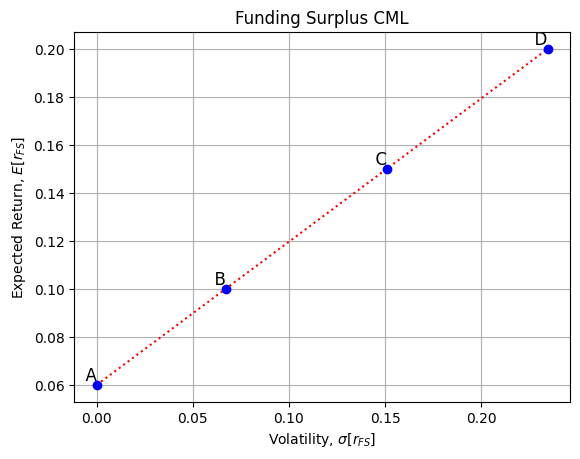

In [26]:
import matplotlib.pyplot as plt
# Plot the lines and points

#points
for color, line_points in lines.items():
    x_values = [points[pt][0] for pt in line_points]
    y_values = [points[pt][1] for pt in line_points]
    plt.plot(x_values, y_values, linestyle='dotted', color=color)

#label
for label, (x, y) in points.items():
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y, f'  {label}', verticalalignment='bottom', horizontalalignment='right', fontsize=12)

# Set the labels and title
plt.title('Funding Surplus CML')
plt.xlabel(r'Volatility, $\sigma[r_{FS}]$')
plt.ylabel(r'Expected Return, $E[r_{FS}]$')
# Show the grid
plt.grid(True)

#Show the figure
plt.show()

To attain higher funding surplus growth rates, the manager must accept more funding surplus volatility.

Then we plot the optimal asset betas:

(1) We input the beta 1a and beta 2a

In [27]:
# beta_1a
beta1a_A = 0.56
beta1A_b = 0.6199
beta1a_C = 0.6947
beta1a_D = 0.7695

#beta_2a
beta2a_A = 0.91
beta2A_b = 0.9504
beta2a_C = 1.0010
beta2a_D = 1.0510

(2) Make the matrix to store the points

In [28]:
points = {
    'A': (beta2a_A, beta1a_A),
    'B': (beta2A_b, beta1A_b),
    'C': (beta2a_C, beta1a_C),
    'D': (beta2a_D, beta1a_D)
}

(3) We need one line to link the points

In [29]:
lines = {
    'red': ('A', 'B', 'C', 'D')
}

(4) Plot the lines and points

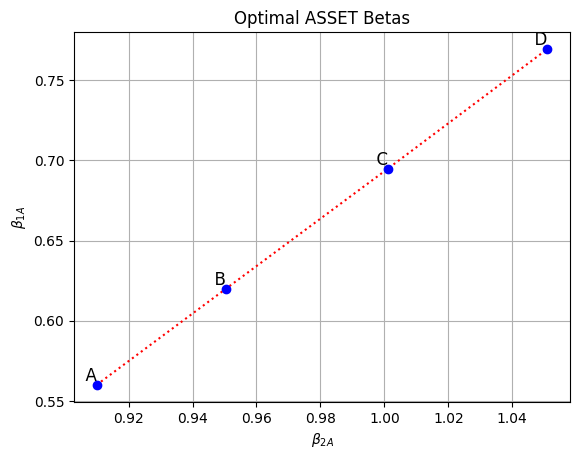

In [30]:
# Plot the lines and points

#points
for color, line_points in lines.items():
    x_values = [points[pt][0] for pt in line_points]
    y_values = [points[pt][1] for pt in line_points]
    plt.plot(x_values, y_values, linestyle='dotted', color=color)

#label
for label, (x, y) in points.items():
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y, f'  {label}', verticalalignment='bottom', horizontalalignment='right', fontsize=12)

# Set the labels and title
plt.title('Optimal ASSET Betas')
plt.xlabel(r'$\beta_{2A}$')
plt.ylabel(r'$\beta_{1A}$')

# Show the grid
plt.grid(True)

#Show the figure
plt.show()

We move from asset betas of $(.56,91)$ if we want $E[r_{FS}]=6 \%$ to betas of $(.7695,1.051)$ if want $E[r_{FS}]=20 \%$. Since both assets are risk-enhancing factors, we must increase exposure to each of them as we increase $E[r_{FS}]$. The slope of this line characterizes the efficient combinations of the two risk factors.

The liability of this plan lies to the right of the graph at $\left(\operatorname{Beta}_{11}, \operatorname{Beta}_{21}\right)=(.8,1.3)$. The betas of the assets are less than the betas of the liability because the assets are larger than the liability, and so we need less exposure per dollar of assets of the liability.


**Another Two Risk Factor Model Example**

| Risk Factor, $i$         | $\lambda_i$ | $\sigma_i$ | $\sigma_i^2$ | $\lambda_i/\sigma_i^2$ | $\lambda_i^2/\sigma_i^2$ |
|---------------------|--------|-------|---------|----------------|------------------:|
| GDP risk            | 0.15   | 25%   | 0.0625  | 2.4            | 0.3600             |
| Unemployment risk   | -0.05  | 20%   | 0.04    | -1.25          | 0.0625           |
|Risk Free Rate= 4%   |        |       |         |                | sum = 0.4225     |


The pension plan's liability betas are: $\beta_{1L}=0.65$, and $\beta_{2L}=0.44$

The plan's Assets, liability and funding Surplus are: $A_{0}=2300, L_{0}=1750, FS_{0}=550$

a) What are the optimal funding surplus betas and optimal asset betas if the plan wants its funding surplus to have an expected growth rate ($\overline{r}_{FS}$) of $6 \%$ or $15 \%$ ?

b) Describe the change in the funding surplus betas and the asset betas between the low growth and high growth portfolios ($\overline{r}_{FS}$ $=6 \%$ and $15 \%$ respectively).

**Expected FS Return ($\overline{r}_{FS}$)**

|      | $\beta^*_{1FS}$ | $\beta^*_{2FS}$ | $\beta^*_{1A}$ | $\beta^*_{2A}$ |
|------|---------------------|---------------------|--------------------|--------------------|
| 6%   | 0.1136              | -0.0592             | 0.5217             | 0.3206             |
| 15%  | 0.6249              | -0.3254             | 0.6440             | 0.2570             |


$\beta^*_{1FS}=(2.4 / .4225)*(6 \%-4 \%)=.1136$

$\beta^*_{1A}=(550 / 2300)\times.1136+(1750 / 2300)\times.65=.5217$

The liability betas are both positive: this plan has positive liability exposure to both GDP and UI risk. So, in general, it's asset portfolio will have positive betas as well (both growth portfolios do)

In moving from the low-risk to the high-risk portfolio, the funding surplus beta for GDP risk gets bigger. GDP is a risk-enhancing factor and we wish to increase risk. Also the exposure to UI (unemployment) risk gets smaller (more negative). This is because UI risk is an insurance factor, and we need more (not less) risk. So, we are negatively exposed to the insurance factor and we make it more negative as $\overline{r}_{FS}$ goes up.

Similarly in the Asset portfolio, the GDP beta goes up with $\overline{r}_{FS}$ and the UI beta goes down.




### The SAA Decision

**Converting Optimal Asset Betas to an Asset Mix**

**A Two Factor Example**

A Corporate Pension Plan (Defined Benefit) is concerned with MP risk (Risk Factor 1 = changes in GDP) and DEI risk (Risk Factor 2 = changes in expected inflation). Possible asset class investments are:

-Point C: "Cash" (TBills): no asset risk exposure (zero betas).

Is this good? What if liabilities have exposure? Also without exposure to risk we will have low asset and FS growth rates.

-Point B: A bond portfolio. This investment is hurt by positive shocks to $\mathrm{DEl}: \beta_{D E I}=-0.2<0$.

-Point M: An equity portfolio. Positive risk exposure (asset class betas) to both MP and DEI shocks.

Note, combining points $C$, $B$ and $M$, with non-negative weights, puts the portfolio exposure somewhere in the triangle $(C,M,B)$ in the below figure.

Suppose we want our asset portfolio to have $\beta_{A}=(.3, .1)$, i.e., we want $\beta_{M P, A}=.3$ and $\beta_{D E I, A}=.1$. This is point $X$ on the figure below.

To solve for the optimal portfolio weights in $C$, $B$ and $M$ we set up two equations (because we have two risk factor betas we want) and two unknowns (the weights $X_{B}$ and $X_{M}$, and with $X_{C}=1-X_{B}-X_{M}$ )

MP Risk: $.3=.2 X_{B}+1.2 X_{M}+0\left(1-X_{B}-X_{M}\right)$

DEI Risk: $.1=-.2 X_{B}+0.7 X_{M}+0\left(1-X_{B}-X_{M}\right)$

One way to solve these equations is to add them up. This eliminates $X_{B}$ and gives us

$$0.4=1.9 X_{M} \implies X_{M}=.2105$$

Putting $X_{M}=.2105$ into the first equation: $.3=.2 X_{B}+(1.2)(.2105)$ or $X_{B}=.2370$

Finally, we see our TBill (Cash) investment is $X_{C}=1-X_{B}-X_{M}=.5525$.

So, to achieve the asset portfolio exposures we want, we will put $55.25 \%$ of our endowment in TBills (C), $23.7 \%$ in bonds (B) and $21.05 \%$ in stocks (M). We just constructed our portfolio!


Here we use python to constuct the portfolio:

We first define the function to solve the asset weight

In [31]:
def solve_asset_mix(target_beta_mp, target_beta_dei, beta_mp_b, beta_dei_b, beta_mp_m, beta_dei_m):
    """
    Solve for the optimal portfolio weights on assets C (Cash), B (Bonds), and M (Stocks) to achieve desired beta exposures.

    :param target_beta_mp: Target beta for MP risk
    :param target_beta_dei: Target beta for DEI risk
    :param beta_mp_b: Beta for MP risk for bond portfolio
    :param beta_dei_b: Beta for DEI risk for bond portfolio
    :param beta_mp_m: Beta for MP risk for equity portfolio
    :param beta_dei_m: Beta for DEI risk for equity portfolio
    :return: Portfolio weights for C, B, and M
    """
    # Solving the linear system of equations
    # x[0] = XB, x[1] = XM
    from numpy.linalg import solve
    import numpy as np

    A = np.array([[beta_mp_b, beta_mp_m], [beta_dei_b, beta_dei_m]])
    B = np.array([target_beta_mp, target_beta_dei])

    x = solve(A, B)

    XB = x[0]
    XM = x[1]
    XC = 1 - XB - XM

    return XC, XB, XM

Then we input the target betas（risk) for the asset portfolio and betas for bond (B) and equity (M) portfolios, to get the asset weight:

In [32]:
# Target betas (risk) for the asset portfolio
target_beta_mp = 0.3
target_beta_dei = 0.1

# Betas for bond (B) and equity (M) portfolios
beta_mp_b = 0.2
beta_dei_b = -0.2
beta_mp_m = 1.2
beta_dei_m = 0.7

# Calculate the optimal portfolio weights
XC, XB, XM = solve_asset_mix(target_beta_mp, target_beta_dei, beta_mp_b, beta_dei_b, beta_mp_m, beta_dei_m)

print("Optimal portfolio weights for Cash, Bonds and Stocks are: ", f"{XC, XB, XM}")


Optimal portfolio weights for Cash, Bonds and Stocks are:  (0.5526315789473686, 0.2368421052631578, 0.2105263157894737)


So, the SAA process was as follows:

-We chose a funding surplus growth rate, $\overline{r}_{FS}$.

-From the FS CML, this gave us the optimal funding surplus betas, $\beta_{M P, FS}^{*}$ and $\beta_{D E I, f s}^{*}$.


-We then calculated the optimal asset betas that gave us the chosen funding surplus betas; in this example, the optimal asset betas are $\beta_{M P, A}^{*}=.3$ and $\beta_{D E I, A}^{*}=.1$.

-Finally, here we have converted our asset betas to an SAA mix: $55.25 \%$ in cash, $23.70 \%$ in bonds and $21.05 \%$ in stocks. Notice that, in this case, the optimal asset beta point, $X$, lies within the triangle defined by the three investment vehicles we can access: $C, B$ and $M$. Because the optimal point $X$ is within the triangle, all the asset class weights are positive: we hold some $C$, some $B$ and some $S$.

What if we want a portfolio that is outside of the triangle area defined by $(C, M, B)$ ? If we use asset classes $C, M$ and $B$, we must short (i.e., disinvest) some asset class. Say we want Point $Y$ in the top graph on page OBJ-25: $\beta_{M P, A}^{*}=.2$ and $\beta_{D E I, A}^{*}=.7$. This is outside of the space defined by the triangle $(C,B,M)$.

Solving two equations as we did before:

MP Risk: $.2=.2 X_{B}+1.2 X_{M}+0\left(1-X_{B}-X_{M}\right)$

DEI Risk: $.7=-.2 X_{B}+0.7 X_{M}+0\left(1-X_{B}-X_{M}\right)$

Again, adding the two equations gives $X_{M}=.4737$, which, when substituted back in to either equation above gives $X_{B}=-1.8421$ and $X_{C}=2.3684$.

What a difference from Point $\mathrm{X}$ ! We must now short-sell bonds (i.e., the $X_{B}$ weight is negative) and invest in a mix of cash (a LOT of cash) and stocks to achieve point $Y$.

But, many endowments restrict their investment portfolio to have no short-selling. This could be a big problem if the asset beta point they want lies outside the area defined by the investments the endowment is allowed to hold. What do these trustees do? They fine additional investment vehicles (beyond $C, B$ and $S$ ) that expand their area of long-only investing.


In [33]:
# Target betas for the asset portfolio
target_beta_mp = 0.2
target_beta_dei = 0.7

# Betas for bond (B) and equity (M) portfolios
beta_mp_b = 0.2
beta_dei_b = -0.2
beta_mp_m = 1.2
beta_dei_m = 0.7

# Calculate the optimal portfolio weights
XC, XB, XM = solve_asset_mix(target_beta_mp, target_beta_dei, beta_mp_b, beta_dei_b, beta_mp_m, beta_dei_m)
XC, XB, XM

print("Optimal portfolio weights for Cash, Bonds and Stocks are: ", f"{XC, XB, XM}")

Optimal portfolio weights for Cash, Bonds and Stocks are:  (2.3684210526315783, -1.8421052631578942, 0.47368421052631576)


Then we plot the Beta-changes in GDP (MP) and Beta-changes in Expected Inflation (DEI)

(1) input the points:

In [34]:
# beta dei
betadei_C = 0
betadei_B = -0.2
betadei_M = 0.7
betadei_X = 0.1
betadei_Y = 0.7

#beta mp
betamp_C = 0
betamp_B = 0.2
betamp_M = 1.2
betamp_X = 0.3
betamp_Y = 0.2

(2) make the matrix to input the points:

In [35]:
points = {
    'C': (betamp_C, betadei_C),
    'B': (betamp_B, betadei_B),
    'M': (betamp_M, betadei_M),
    'X': (betamp_X, betadei_X),
    'Y': (betamp_Y, betadei_Y),
}

(3) We need lines to link points:

In [36]:
lines = {
    'red': ('M', 'C'),
    'blue': ('M', 'B'),
    'black': ('C', 'B'),

}

(4) Plot the figure:

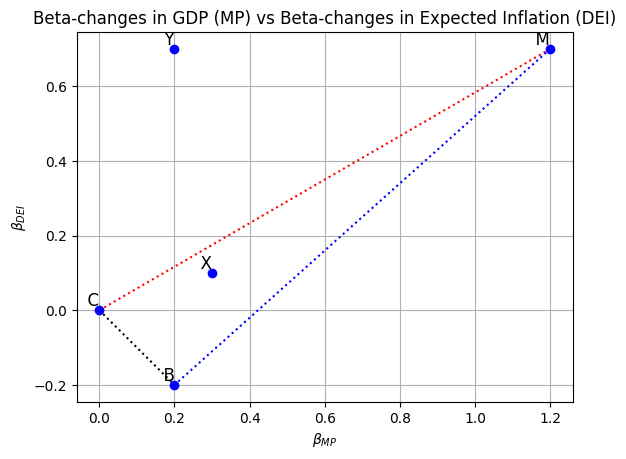

In [37]:
# Plot the lines and points

#points
for color, line_points in lines.items():
    x_values = [points[pt][0] for pt in line_points]
    y_values = [points[pt][1] for pt in line_points]
    plt.plot(x_values, y_values, linestyle='dotted', color=color)

#label
for label, (x, y) in points.items():
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y, f'  {label}', verticalalignment='bottom', horizontalalignment='right', fontsize=12)

# Set the labels and title
plt.title('Beta-changes in GDP (MP) vs Beta-changes in Expected Inflation (DEI)')
plt.xlabel(r'$\beta_{MP}$')
plt.ylabel(r'$\beta_{DEI}$')
# Show the grid
plt.grid(True)

#Show the figure
plt.show()

The previous page shows that if the trustees' preferred asset portfolio beta point lies outside the area defined by the asset class investments they can make (here, C, B and M), then they must short-sell some asset class to achieve a point outside the "feasible long-only area". But, if the endowment can NOT short-sell, then they must expand the area of "feasible long-only investments".

Suppose an intermediary forms two factor portfolios, QDEI and QMP, and sells them as mutual funds or ETFs, in which our trustees ARE allowed to invest (go long). Suppose an investment bank constructs these two ETFs:

Point $Q M P$ in the graph has $\beta_{M P, Q M P}=1.0$ and $\beta_{D E I, Q M P}=0$ and

Point $\mathrm{QDEI}$ in the graph has $\beta_{M P, Q D E I}=0$ and $\beta_{D E I, Q D E I}=1.0$

As shown below figure, this has expanded the feasible area of investing for the trustees. Now, Point $Y$ falls within the new feasible long-only investment area. Note that to create these two ETFs, the investment bank (the intermediary) did have to short some of the original asset classes $\mathrm{C}$, $B$ and $M$, but an investment bank CAN short! To create these ETFs, the bank had to form portfolios with weights:

Point QMP comes from: $X_{C}=-1.368, X_{B}=1.842$ and $X_{M}=0.526$

Point QDEl comes from: $X_{C}=3.633, X_{B}=-3.159$ and $X_{M}=0.526$

So, to create the QMP ETF, the investment bank had to short TBills (borrow) and to create the QDEI ETF, the investment bank had to short bonds. It can do that. And, the trustees can buy (go long) either or both of these ETFs as part of their investment portfolio.


In [38]:
# Target betas for QMP
target_beta_mp = 1
target_beta_dei = 0

# Betas for bond (B) and equity (M) portfolios
beta_mp_b = 0.2
beta_dei_b = -0.2
beta_mp_m = 1.2
beta_dei_m = 0.7

# Calculate the optimal portfolio weights
XC, XB, XM = solve_asset_mix(target_beta_mp, target_beta_dei, beta_mp_b, beta_dei_b, beta_mp_m, beta_dei_m)
print("When target betas are for QMP, Optimal portfolio weights for Cash, Bonds and Stocks are: ", f"{XC, XB, XM}")

When target betas are for QMP, Optimal portfolio weights for Cash, Bonds and Stocks are:  (-1.3684210526315792, 1.842105263157895, 0.5263157894736842)


In [39]:
# Target betas for QDEI
target_beta_mp = 0
target_beta_dei = 1

# Betas for bond (B) and equity (M) portfolios
beta_mp_b = 0.2
beta_dei_b = -0.2
beta_mp_m = 1.2
beta_dei_m = 0.7

# Calculate the optimal portfolio weights
XC, XB, XM = solve_asset_mix(target_beta_mp, target_beta_dei, beta_mp_b, beta_dei_b, beta_mp_m, beta_dei_m)
print("When target betas are for QDEI, Optimal portfolio weights for Cash, Bonds and Stocks are: ", f"{XC, XB, XM}")

When target betas are for QDEI, Optimal portfolio weights for Cash, Bonds and Stocks are:  (3.6315789473684204, -3.157894736842105, 0.5263157894736842)


Now (see the bottom graph on the next page), if the pension plan wants its asset portfolio at point $Y$, it can use 5 possible investments: C. M, B, QMP and QDEI. With two risk factors (2 equations to solve), we only need three asset classes to get a solution. We could use M, QDEl and C:

MP Risk: $.2=1.2 X_{M}+0 X_{Q D E I}+0\left(1-X_{M}-X_{Q D E I}\right)$

DEI Risk: . $7=.7 X_{M}+1 X_{Q D E I}+0\left(1-X_{M}-X_{Q D E I}\right)$

Solving yields $X_{C}=0.25, X_{M}=0.1667$ and $X_{Q D E I}=0.5833$

An even easier solution is to use cash and the two factor portfolios:

MP Risk: $.2=1 X_{Q M P}+0 X_{Q D E I}+0\left(1-X_{M}-X_{Q D E I}\right)$

DEI Risk: . $7=0 X_{Q M P}+1 X_{Q D E I}+0\left(1-X_{M}-X_{Q D E I}\right)$

Solving yields $X_{C}=0.1, X_{Q M P}=0.20$ and $X_{Q D E I}=0.70$


We plot the Beta-Changes in GDP (MP) vs Beta-Changes in Expected Inflation (DEI):

(1) input the beta dei and beta mp

In [40]:
# beta dei
betadei_C = 0
betadei_B = -0.2
betadei_M = 0.7
betadei_X = 0.1
betadei_Y = 0.7
betadei_dei = 1
betadei_mp =0

#beta mp
betamp_C = 0
betamp_B = 0.2
betamp_M = 1.2
betamp_X = 0.3
betamp_Y = 0.2
betamp_dei = 0
betamp_mp = 1

(2) make the matrix to input points

In [41]:
points = {
    'C': (betamp_C, betadei_C),
    'B': (betamp_B, betadei_B),
    'M': (betamp_M, betadei_M),
    'X': (betamp_X, betadei_X),
    'Y': (betamp_Y, betadei_Y),
    'Q(DEI)': (betamp_dei, betadei_dei),
    'Q(MP)': (betamp_mp, betadei_mp),
}

(3) use the lines to link points

In [42]:
lines = {
    'blue': ('M', 'Q(MP)'),
    'black': ('Q(MP)', 'B'),
    'red': ('C', 'B'),
    'green': ('M', 'Q(DEI)'),

}

(4) plot the figure:

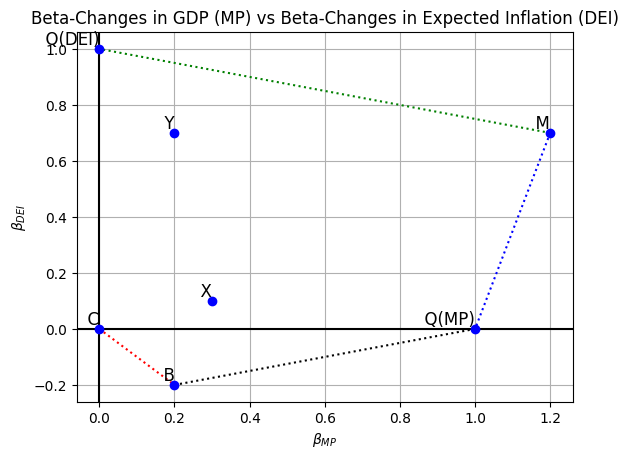

In [43]:
# Plot the lines and points

#points
for color, line_points in lines.items():
    x_values = [points[pt][0] for pt in line_points]
    y_values = [points[pt][1] for pt in line_points]
    plt.plot(x_values, y_values, linestyle='dotted', color=color)

#label
for label, (x, y) in points.items():
    plt.scatter(x, y, color='blue', zorder=5)
    plt.text(x, y, f'  {label}', verticalalignment='bottom', horizontalalignment='right', fontsize=12)

# makes the vertical and horizontal axis intersect at the origin
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

    

# Set the labels and title
plt.xlabel(r'$\beta_{MP}$')
plt.ylabel(r'$\beta_{DEI}$')
plt.title('Beta-Changes in GDP (MP) vs Beta-Changes in Expected Inflation (DEI)')
# Show the grid
plt.grid(True)

#Show the figure
plt.show()

## Examples

Assume for both the following examples that we can invest in the asset classes shown on the previous page. We use the market-related data:

$$
r_{f}=0.02, \lambda_{M P}=0.16, \lambda_{D E I}=0.06, \sigma_{M P}^{2}=0.09 \text { and } \sigma_{D E I}^{2}=0.05
$$

**Example 1**

Consider a new plan with $A_{0}=900, L_{0}=700$, so $F S_{0}=200$. This plan's liability has only modest exposure to both MP risk and DEI risk: $\beta_{M P, L}=0.5$ and $\beta_{D E I, L}=0.25$

Using the capital market data above, we calculate:


\begin{align*}
\beta_{M P, FS}^{*}&=\left(\frac{1.7778}{0.35644}\right)(\overline{r}_{FS}-0.02) \\
\beta_{D E I, FS}^{*}&=\left(\frac{1.2000}{0.35644}\right)(\overline{r}_{FS}-0.02) \\
\beta_{M P, A}^{*}&=\left(\frac{200}{900}\right) \beta_{M P, FS}^{*}+\left(\frac{700}{900}\right)(0.50)=0.2222 \beta_{M P, FS}^{*}+0.3889 \\
\beta_{D E I, A}^{*}&=\left(\frac{200}{900}\right) \beta_{D E I, FS}^{*}+\left(\frac{700}{900}\right)(0.25)=0.2222 \beta_{D E I,FS}^{*}+0.1944
\end{align*}


For a modest desired funding surplus growth rate of $\overline{r}_{FS}=0.04$, this requires (try this yourself):

$$
\beta_{M P, FS}^{*}=0.0997, \beta_{D E I, FS}^{*}=0.0673 \beta_{M P, A}^{*}=0.41 \text { and } \beta_{D E I, A}^{*}=0.21
$$

Using the five asset classes in the previous graph, we can achieve this FS growth rate in more than one way. For example (check for yourself):

$$
X_{C}=.582 X_{B}=.092 \text { and } X_{M}=.326
$$

The modest growth required ($\overline{r}_{FS}=0.04$) means a large cash position, and a bigger liability to MP risk leads to the stock market investment. Alternatively,

$$
X_{C}=.38 X_{Q M P}=.41 \text { and } X_{Q D E I}=.21
$$

also works. We invest in the factor portfolios in the proportions needed by our desired asset exposures.


**Example 2**

Consider another plan with $A_{0}=900, L_{0}=700$, so $F S_{0}=200$, and $\beta_{M P, L}=0.4$ and $\beta_{D E I, L}=1.40$.

So, this plan has a liability that is much more exposed to DEI risk than was the plan in the previous example. Also, this plan wants a much higher FS growth rate: $\overline{r}_{FS}=0.10$. This leads to optimal asset betas (you can check for yourself): $\beta_{M P, A}^{*}=0.40$ and $\beta_{D E I, A}^{*}=1.15$.

From the bottom graph on page OBJ-25, we see that the trustees need asset betas that are not attainable without shorting some asset class.

What do we do in this case? Assuming we can't short any asset class, we can only choose an asset risk profile within the feasible region. If we wanted to get to $\beta_{M P, A}^{*}=0.40$ and $\beta_{D E I, A}^{*}=1.15$, we would have to invest with:

$$
X_{B}=-.217 X_{M}=.370 \text { and } X_{Q D E I}=.848
$$

which we cannot do because of the short position in bonds. We are outside the feasible area in the bottom graph on page OBJ-25, but we're not too far from edge of the area just using QDEI and M. So, we can search over different combinations of $\mathrm{M}$ and DEI with $X_{M}+X_{Q D E I}=1$ to find that

$$
X_{M}=.420 \text { and } X_{Q D E I}=.580
$$

yields:

$\beta_{M P, A}=.504, \beta_{D E I, A}=.874, \beta_{M P, FS}=.868$ and $\beta_{D E I, FS}=-.967$ for $E[r_{FS}]=.101$

The expected funding surplus growth rate is close to the desired $\overline{r}_{FS}=0.10$ is pretty close to the FS growth rate we originally wanted. However, this solution is not a mean-variance efficient way to achieve $\overline{r}_{FS}=.10$, so that we are bearing a little more FS risk than we would like. But, we can't short!

So, in this example, we just worked backwards in the portfolio construction process: we decided we could only use assets $\mathrm{M}$ and QDEI, and we found a combination of the two that had acceptable asset betas and, converting those back to FS betas, we got the FS growth rate of $10.1 \%$.

In summary, the SAA decision using the ALM model takes into account the plan's liability exposure to the risk factors and then selects asset exposures to minimize funding surplus volatility for a chosen level of funding surplus expected growth.


## An alternative SAA Technique: Monte Carlo Simulation

A convenient and flexible way to assess the effect of factor risk exposures to portfolio returns is to perform "Monte-Carlo Simulations." This technique relies on drawing hypothetical realization of the factor shocks in order to simulate possible future scenarios. These shocks are used to assess the future distribution of portfolio returns implied by a chosen asset allocation. We provide an example below that involves two risk factors. 


**Step 1:** Define the relevant risk factors, $I_{1}$ and $I_{2}$ : perhaps GDP risk and Unexpected Inflation

Generate 10,000 observations from a random number generator, for $I_{1}$ and $I_{2}$, for 10 straight years.

Here we assume:

$$
I_{1} \sim U(-0.05, 0.05)
$$

$$
I_{2} \sim U(-0.006, 0.006)
$$

The assumption is close to the data in Liu and Zhang (2008)

In [44]:
##Import the package:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [45]:
# Step 1
# Define the relevant risk factors and their distributions
I1 = 'GDP Risk' # GDP risk
I2 = 'Unexpected Inflation' #Unexpected inlfation

# Define the number of observations and the year
num_observations = 10000 #Set the number of observations in the simulation
num_years = 10 #Set the number of years

#generate the I1_shock and I2_shock
I1_shock = np.random.uniform(-0.05, 0.05, (num_years, num_observations))
I2_shock = np.random.uniform(-0.006, 0.006, (num_years, num_observations))

random_shocks = np.array([[[I1_shock[i,j], I2_shock[i, j]] for j in range(num_observations)] for i in range(num_years)] )

**Step 2:** Define asset class exposures: $\beta_{i j}$, $\lambda_{k}$ and risk-free rate $r_f$

-For example: stock market exposure to MP and DEI risks, bond index exposure to MP and DEI risks, etc. These can come from regressions of asset class returns on risk factor shocks, using historical data. Here we use the guess value of beta from the above example.

Assume we have two assets: Bond (b) and Stock (m):

In [46]:
# Define asset class exposures (betas) to the risk factors

#bond beta for mp and dei
beta_mp_b = 0.2
beta_dei_b = -0.2

#stock beta for mp and dei
beta_mp_m = 1.2
beta_dei_m = 0.7

beta_ij = {
    'bonds': {'I1': beta_mp_b, 'I2': beta_dei_b},
    'stocks': {'I1': beta_mp_m, 'I2': beta_dei_m},
}

$\lambda_{M P}=0.136, \lambda_{D E I}=-0.001$, which are risk premiums for GDP and unexpected inflation respectively. The parameters are consistent with those in CRR paper.

In [47]:
# Define lambdas for mp risk and dei risk
lambda_mp = 0.136
lambda_dei = -0.001

Risk free rate $r_f$ = 0.02

In [48]:
# Define the risk free rate
rf = 0.02

**Step 3:** Define the plan's liability betas: $\beta_{1 L}$ and $\beta_{2 L}$

-These can also come from regressions

Here we still use the value from the above example 1

In [49]:
# Define the plan's liability betas to the risk factors, with modest exposure:
beta_1l = 0.5
beta_2l = 0.25

beta_l = np.array([beta_1l, beta_2l])

**Step 4: Initial setting**

In [50]:
##Initial setting
FS0 = 2  # Initial funding surplus
A0 = 9  # Initial assets
L0 = 7 # Initial liabilities

**Step 5:** Try a specific asset mix (i.e., a SAA), i.e., the weights on the asset classes. This implies the asset betas, $\beta_{1 A}$ and $\beta_{2 A}$

-Calculate 10,000 10-year paths of asset returns,

$$
r_{A} = r_f + w_{b}\times[\beta_{1A_b}\times(\lambda_1 + I_{1}) + \beta_{2A_b}\times(\lambda_2 + I_{2})] + w_{m}\times[\beta_{1A_m}\times(\lambda_1 + I_{1}) + \beta_{2A_m}\times(\lambda_2 + I_{2})]
$$

-Calculate $r_{L}$

$$
r_{L} = r_f + \beta_{1L}\times(\lambda_1 + I_{1}) + \beta_{2L}\times(\lambda_2 + I_{2})
$$

-Calculate $r_{FS}$

$$
r_{FS}=\frac{F S_{1}-F S_{0}}{F S_{0}}=\left(\frac{A_{0}}{F S_{0}}\right) r_{A}-\left(\frac{L_{0}}{F S_{0}}\right) r_{L}
$$

-For each of the 10,000 observations, get

$$
F S_{10}=F S_{0} \left[\left(1+r_{FS,1}\right) \times  \left(1+r_{FS,2}\right)\times\ldots \left(1+r_{FS,10}\right)\right]
$$

Where $r_{FS,1}$ is a year 1 return, $r_{FS,2}$ is a year 2 return, etc.

The end result is, for a particular SAA (asset class weights) choice, a distribution (of 10,000 observations) for the funding surplus after 10 years. Trustees must decide which distribution (for different SAA choices) meets their preferred reward-risk trade-off.

In [51]:
# Define the asset mixes for the conservative and aggressive SAA
#conservative strategy
conservative_bond_w = 0.6
conservative_stock_w = 0.4
conservative_mix = {'bonds': conservative_bond_w , 'stocks': conservative_stock_w}

#aggressive strategy
aggressive_bond_w = 0.4
aggressive_stock_w = 0.6
aggressive_mix = {'bonds': aggressive_bond_w, 'stocks': aggressive_stock_w}

#Calculate the stock returns and bond returns based on the random shocks
r_a_conservative = np.zeros((num_observations, num_years))
r_a_aggressive = np.zeros((num_observations, num_years))
r_l = np.zeros((num_observations, num_years))

#Calculate conservative ra
for year in range(num_years):
    for observation in range(num_observations):
      r_a_aggressive[observation, year] += rf
      for asset, weights in conservative_mix.items():
          r_a_conservative[observation, year] += weights * (beta_ij[asset]['I1'] * (random_shocks[year, observation, 0] + lambda_mp) +
                                                            beta_ij[asset]['I2'] * (random_shocks[year, observation, 1] + lambda_dei))

#Calculate aggressive ra
for year in range(num_years):
    for observation in range(num_observations):
      r_a_aggressive[observation, year] += rf
      for asset, weights in aggressive_mix.items():
          r_a_aggressive[observation, year] += weights * (beta_ij[asset]['I1'] * (random_shocks[year, observation, 0] + lambda_mp) +
                                                          beta_ij[asset]['I2'] * (random_shocks[year, observation, 1] + lambda_dei))

#Calculate aggressive rl
r_l[observation, year] = rf + beta_l[0] * (random_shocks[year, observation, 0] + lambda_mp) + beta_l[1] * (random_shocks[year, observation, 1] + lambda_dei)

# Calculate funding surplus returns and final FS after 10 years for both strategies
FS_10_conservative = FS0 * np.cumprod(1 + (A0 / FS0) * r_a_conservative - (L0 / FS0) * r_l, axis=1)[:, -1]
FS_10_aggressive = FS0 * np.cumprod(1 + (A0 / FS0) * r_a_aggressive - (L0 / FS0) * r_l, axis=1)[:, -1]


**Step 6:** Plot the result

Plot the histogram

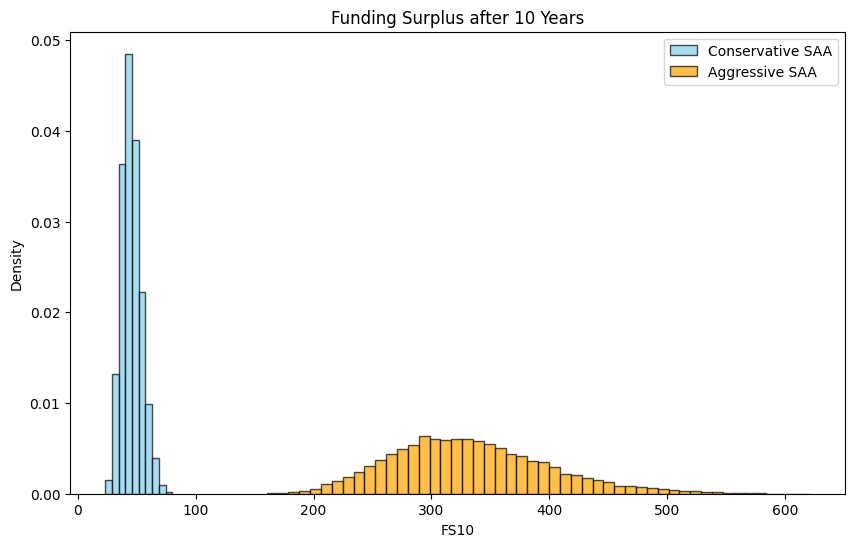

In [52]:
# Plotting the results

# plot the above results on a single graph and make it a density plot
plt.figure(figsize=(10, 6))
plt.hist(FS_10_conservative, bins=10, color='skyblue', edgecolor='black', label='Conservative SAA', density=True, alpha=0.7)
plt.hist(FS_10_aggressive, bins=50, color='orange', edgecolor='black', label='Aggressive SAA', density=True, alpha=0.7)
plt.title('Funding Surplus after 10 Years')
plt.xlabel('FS10')
plt.ylabel('Density')
plt.legend()
plt.show()



Based on the above histogram, trustees of a pension plan can assess the likelihood of the fund being underfunded over a 10-year horizon. In the example above, the likelihood of underfunding ($FS<0$) is very low under both strategies.